# Section 9: Python for Data Visualization - Seaborn 

# 03 - Matrix Plots

In [3]:
### We are going to create matrix plots, primarily heatmaps using seaborn.

import seaborn as sns 
%matplotlib inline 

tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
flights.head() ##Shows number of passengers that flew in a month from a given year 

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


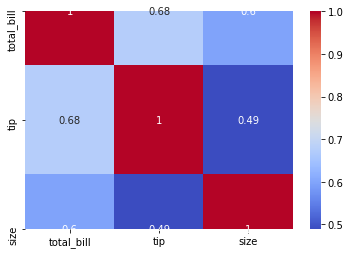

In [20]:
## A - Heatmaps - For heatmaps to work properly your data should be in a matrix form. 
               ## Index name and column name matchup such that the cell value actually indicates something that is 
               ## relevant to both of those names. 

tc = tips.corr()    ## Outputs our data in matrix form - Column and index variable name indicate relevancy to both the 
                    ## column and index name for the cell where they match on. 

## Calling a heatmap
sns.heatmap(tc, annot = True, cmap = 'coolwarm') 

##Colors our matrix with some sort of a gradient colorscale -> Shows correlation between the values in
## our data -> Main application of matrix plots 
    
##Other useful arguments 
# - annotations -> annot = True -> Shows not only the gradient but also the values 
# - cmap -> Show the actual color mapping we want
    

In [21]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [25]:
## Lets get this intro matrix form using a pivot table

fp = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers') ##We obtain a good correlation of our data

In [27]:
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


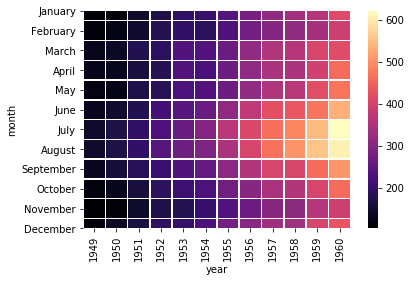

In [31]:
sns.heatmap(fp, cmap = 'magma', linecolor = 'white', linewidth = 0.5) 

## We can easily tell which month of which year had the most flights 

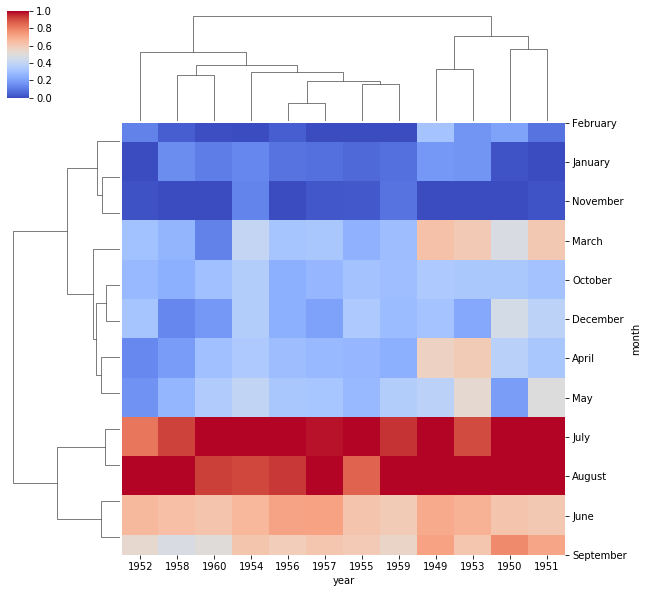

In [34]:
## B - Clustermaps -> Use hierarchical clustering to produce a clustered version of a cluster

sns.clustermap(fp, cmap = 'coolwarm', standard_scale = 1) ## Data is clustered based on similarity
                                                          ## We can also normalize our scale in a 0-1 scale